<a href="https://colab.research.google.com/github/annamarydona/project/blob/main/Drugs_pred_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [27]:
#upload a file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/archive (1).zip")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [28]:
#print columns
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [29]:
#print head
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [30]:
#print tail
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [31]:
#shape and size of the data
df.shape

(200, 6)

#**Preprocessing DataSet**
Calculating counts and graphical representation of following attributes

Drug,BP,Cholestrol

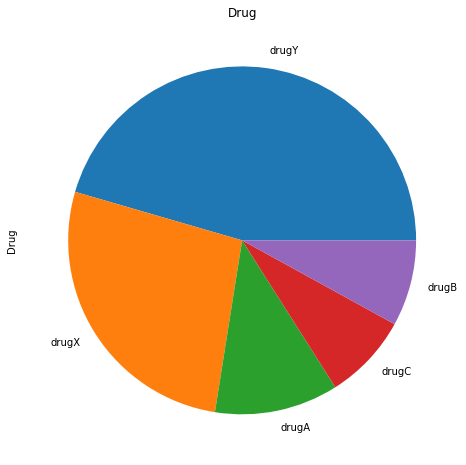

In [32]:
#Drug
plt.figure(figsize=(10,8))
df['Drug'].value_counts().plot(kind='pie')
plt.title('Drug')
plt.show()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


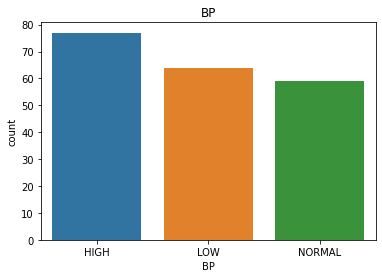

In [33]:
#BP
print(df['BP'].value_counts())
sns.countplot(x=df['BP'])
plt.title('BP')
plt.show()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


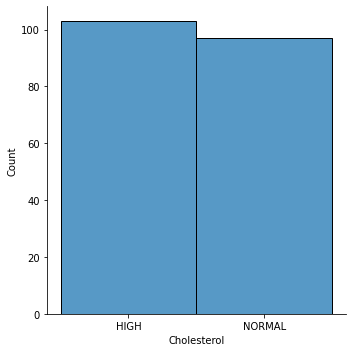

In [34]:
#Cholesterol
print(df['Cholesterol'].value_counts())
sns.displot(df['Cholesterol'])

##**Checking Missing Values**

In [6]:
#check missing values
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#**Encoding Technique-Get Dummies**

In [7]:
#do encoding technique
#get dummies
df1=pd.get_dummies(df[['Sex','BP','Cholesterol']],drop_first=True)
df1

,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,0,0,0,0
1,1,1,0,0
2,1,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
195,0,1,0,0
196,1,1,0,0
197,1,0,1,0
198,1,0,1,1


In [8]:
df1.columns

Index(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL'], dtype='object')

In [9]:
#drop unnecessary columns
df2=df.drop(['Sex','BP','Cholesterol'],axis=1)
df2

,Age,Na_to_K,Drug
0,23,25.355,drugY
1,47,13.093,drugC
2,47,10.114,drugC
3,28,7.798,drugX
4,61,18.043,drugY
...,...,...,...
195,56,11.567,drugC
196,16,12.006,drugC
197,52,9.894,drugX
198,23,14.020,drugX


In [10]:
#compaign the needed dataframes
df3=pd.concat([df1,df2],axis=1)
df3

,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Age,Na_to_K,Drug
0,0,0,0,0,23,25.355,drugY
1,1,1,0,0,47,13.093,drugC
2,1,1,0,0,47,10.114,drugC
3,0,0,1,0,28,7.798,drugX
4,0,1,0,0,61,18.043,drugY
...,...,...,...,...,...,...,...
195,0,1,0,0,56,11.567,drugC
196,1,1,0,0,16,12.006,drugC
197,1,0,1,0,52,9.894,drugX
198,1,0,1,1,23,14.020,drugX


In [11]:
df3.columns

Index(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age', 'Na_to_K',
       'Drug'],
      dtype='object')

#**Separate Input & Output Datas**

In [12]:
#separate x and y
x=df3.iloc[:,:-1].values
y=df3.iloc[:,-1].values
x
y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

#**Train Test Split**

In [13]:
#training and testing input and output datas
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 0.   ,  0.   ,  0.   ,  0.   , 20.   , 11.262],
       [ 0.   ,  0.   ,  0.   ,  0.   , 56.   , 25.395],
       [ 1.   ,  0.   ,  0.   ,  0.   , 74.   ,  9.567],
       [ 1.   ,  1.   ,  0.   ,  0.   , 43.   , 15.376],
       [ 1.   ,  0.   ,  1.   ,  1.   , 46.   ,  7.285],
       [ 0.   ,  0.   ,  0.   ,  0.   , 61.   , 25.475],
       [ 1.   ,  0.   ,  1.   ,  1.   , 50.   , 15.79 ],
       [ 1.   ,  0.   ,  0.   ,  1.   , 64.   , 20.932],
       [ 1.   ,  0.   ,  1.   ,  0.   , 62.   , 16.594],
       [ 0.   ,  0.   ,  0.   ,  0.   , 55.   , 10.977],
       [ 1.   ,  0.   ,  1.   ,  1.   , 67.   , 10.898],
       [ 1.   ,  0.   ,  1.   ,  1.   , 35.   ,  7.845],
       [ 1.   ,  0.   ,  1.   ,  1.   , 43.   , 12.859],
       [ 0.   ,  0.   ,  0.   ,  1.   , 58.   , 14.239],
       [ 0.   ,  0.   ,  0.   ,  1.   , 32.   , 10.292],
       [ 0.   ,  1.   ,  0.   ,  1.   , 65.   , 13.769],
       [ 1.   ,  0.   ,  0.   ,  0.   , 31.   , 30.366],
       [ 0.   ,  0.   ,  1.   ,

#**Normalization Method**

In [15]:
#normalization method
#standardfrom sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-1.08972474e+00, -6.43538199e-01, -6.54653671e-01,
        -8.91555828e-01, -1.59046320e+00, -6.85429715e-01],
       [-1.08972474e+00, -6.43538199e-01, -6.54653671e-01,
        -8.91555828e-01,  6.25107426e-01,  1.36866064e+00],
       [ 9.17662935e-01, -6.43538199e-01, -6.54653671e-01,
        -8.91555828e-01,  1.73289274e+00, -9.31781032e-01],
       [ 9.17662935e-01,  1.55390931e+00, -6.54653671e-01,
        -8.91555828e-01, -1.74959744e-01, -8.75009148e-02],
       [ 9.17662935e-01, -6.43538199e-01,  1.52752523e+00,
         1.12163475e+00,  9.67114161e-03, -1.26344693e+00],
       [-1.08972474e+00, -6.43538199e-01, -6.54653671e-01,
        -8.91555828e-01,  9.32825568e-01,  1.38028784e+00],
       [ 9.17662935e-01, -6.43538199e-01,  1.52752523e+00,
         1.12163475e+00,  2.55845655e-01, -2.73301507e-02],
       [ 9.17662935e-01, -6.43538199e-01, -6.54653671e-01,
         1.12163475e+00,  1.11745645e+00,  7.20008180e-01],
       [ 9.17662935e-01, -6.43538199e-01,  1.527

#**Model Creation**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model=KNeighborsClassifier(n_neighbors=5)
model1 = SVC()
model2 = GaussianNB()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
ls_model=[model,model1,model2,model3,model4]

#**Performance Measurment**

KNeighborsClassifier()
**************************************************
              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       0.50      1.00      0.67         3
       drugC       1.00      0.50      0.67         6
       drugX       0.82      1.00      0.90        18
       drugY       0.86      0.69      0.77        26

    accuracy                           0.82        60
   macro avg       0.81      0.84      0.79        60
weighted avg       0.84      0.82      0.81        60

***************************************************
SVC()
**************************************************
              precision    recall  f1-score   support

       drugA       1.00      0.71      0.83         7
       drugB       0.43      1.00      0.60         3
       drugC       1.00      0.67      0.80         6
       drugX       1.00      1.00      1.00        18
       drugY       0.92      0.92      0.92        26

  

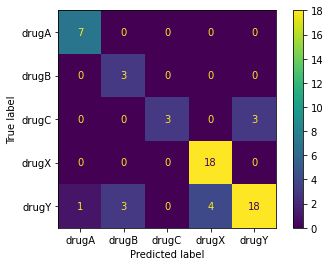

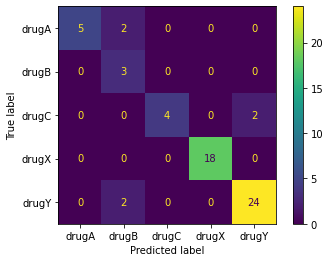

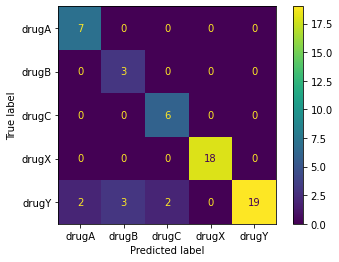

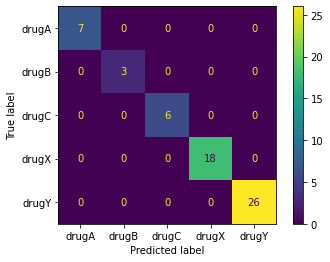

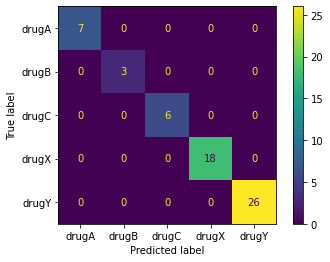

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

for i in ls_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_df = accuracy_df.append({'Model': str(i), 'Accuracy': accuracy}, ignore_index=True)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print('**************************************************')
  print(classification_report(y_test,y_pred))
  print('***************************************************')

##**Visualizations**

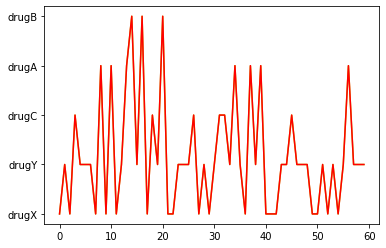

In [39]:
plt.plot(y_test,color='y')
plt.plot(y_pred,color='r')

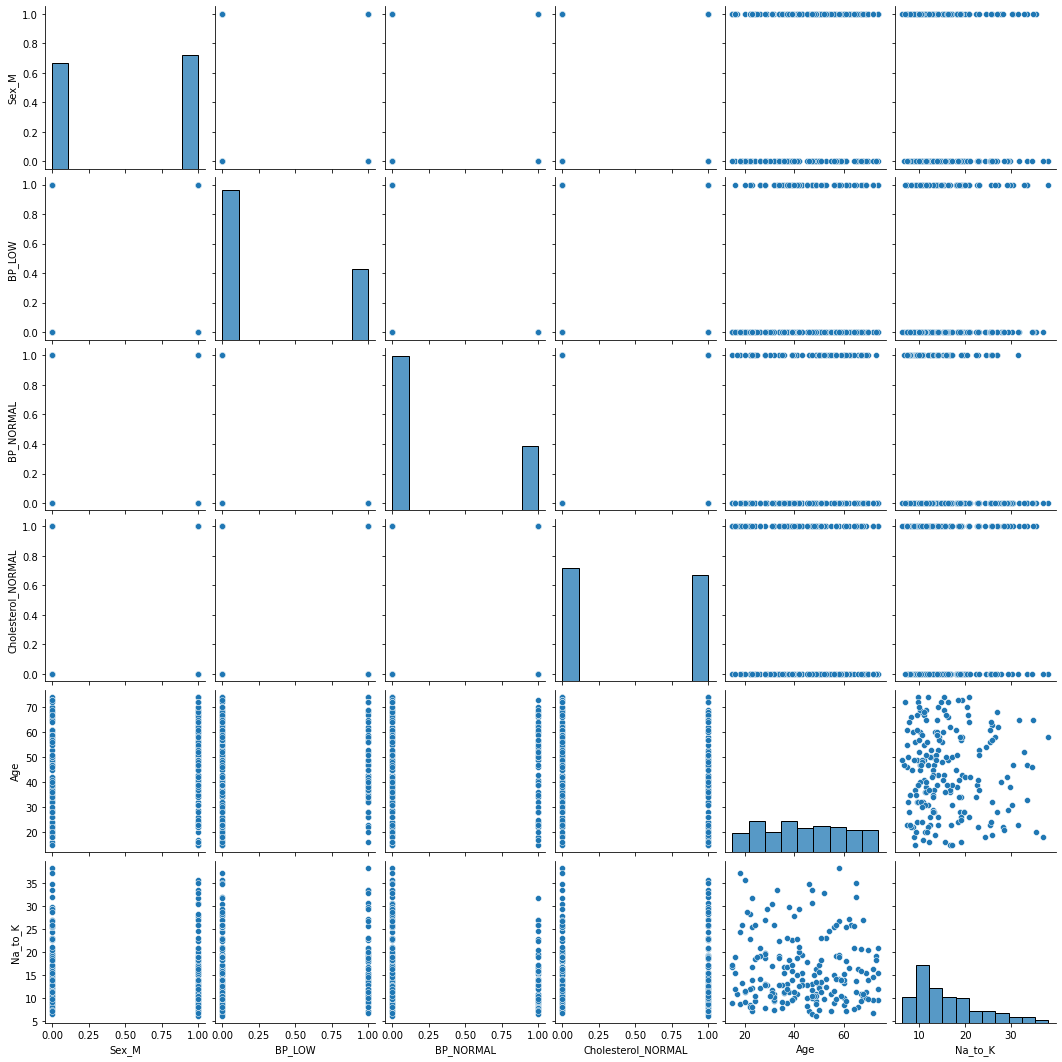

In [42]:
sns.pairplot(df3)